In [46]:
import numpy as np
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings

import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns # viz
import matplotlib.pyplot as plt # viz
from scipy import stats
import json
from typing import List, Tuple
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import warnings
warnings.filterwarnings('ignore')


# Import Whole Usable Dataset Preprocessed

In [47]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
df = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset_OHE/total_subset.csv')
df = df.drop(columns='evil')

a:\Desktop\FYP Final Files\Analysis Notebooks


In [83]:
def count_rows_where_columns_are_zero(df):
    # Filter rows where all specified columns are equal to 0
    filtered_df = df[(df['System_Core'] == 0) & 
                     (df['Amazon_AWS'] == 0) & 
                     (df['Container_Virtualization'] == 0) & 
                     (df['Maintenance_Package_Management'] == 0) & 
                     (df['Security_Monitoring'] == 0) & 
                     (df['Utility_Misc'] == 0) & 
                     (df['sus'] == 0)]
    
    # Count the number of rows in the filtered DataFrame
    num_rows = filtered_df.shape[0]
    
    return num_rows

count_rows_where_columns_are_zero(df)

5731

In [78]:
df.shape

(1141078, 14)

In [65]:
count_when_sus_0 = df[df['sus'] == 0].sum()
count_when_sus_1 = df[df['sus'] == 1].sum()


In [66]:
count_when_sus_0

processId                            944602
parentProcessId                      869721
userId                                    0
mountNamespace                       339905
eventId                           258940957
argsNum                             2542537
returnValue                          339386
System_Core                          393633
Amazon_AWS                             6280
Container_Virtualization                 29
Maintenance_Package_Management        18690
Security_Monitoring                   91984
Utility_Misc                         451217
sus                                       0
dtype: int64

In [62]:
count_when_sus_1

processId                           173514
parentProcessId                     167846
userId                              163024
mountNamespace                          36
eventId                           11834185
argsNum                             505918
returnValue                         302642
System_Core                           5488
Amazon_AWS                               0
Container_Virtualization                 0
Maintenance_Package_Management         151
Security_Monitoring                   4157
Utility_Misc                           692
sus                                 173514
dtype: int64

In [48]:
df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
0,1,0,0,1,157,5,0,1,0,0,0,0,0,1
1,1,0,0,1,3,1,0,1,0,0,0,0,0,1
2,1,0,0,1,1010,0,0,1,0,0,0,0,0,1
3,1,1,0,0,21,2,2,0,0,0,0,0,1,1
4,1,1,0,0,1005,4,0,0,0,0,0,0,1,1


# Analysis

In [49]:
print(df['sus'].value_counts())
print('\n')
print('\n')
print(df['sus'].value_counts(normalize=True))

sus
0    967564
1    173514
Name: count, dtype: int64




sus
0    0.847939
1    0.152061
Name: proportion, dtype: float64


Check for nulls, pretty standard

In [50]:
df[df.columns].isnull().sum()

processId                         0
parentProcessId                   0
userId                            0
mountNamespace                    0
eventId                           0
argsNum                           0
returnValue                       0
System_Core                       0
Amazon_AWS                        0
Container_Virtualization          0
Maintenance_Package_Management    0
Security_Monitoring               0
Utility_Misc                      0
sus                               0
dtype: int64

Lets get a quick look at what columns we are dealing with

In [51]:
df.head()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
0,1,0,0,1,157,5,0,1,0,0,0,0,0,1
1,1,0,0,1,3,1,0,1,0,0,0,0,0,1
2,1,0,0,1,1010,0,0,1,0,0,0,0,0,1
3,1,1,0,0,21,2,2,0,0,0,0,0,1,1
4,1,1,0,0,1005,4,0,0,0,0,0,0,1,1


Lets look at distribution

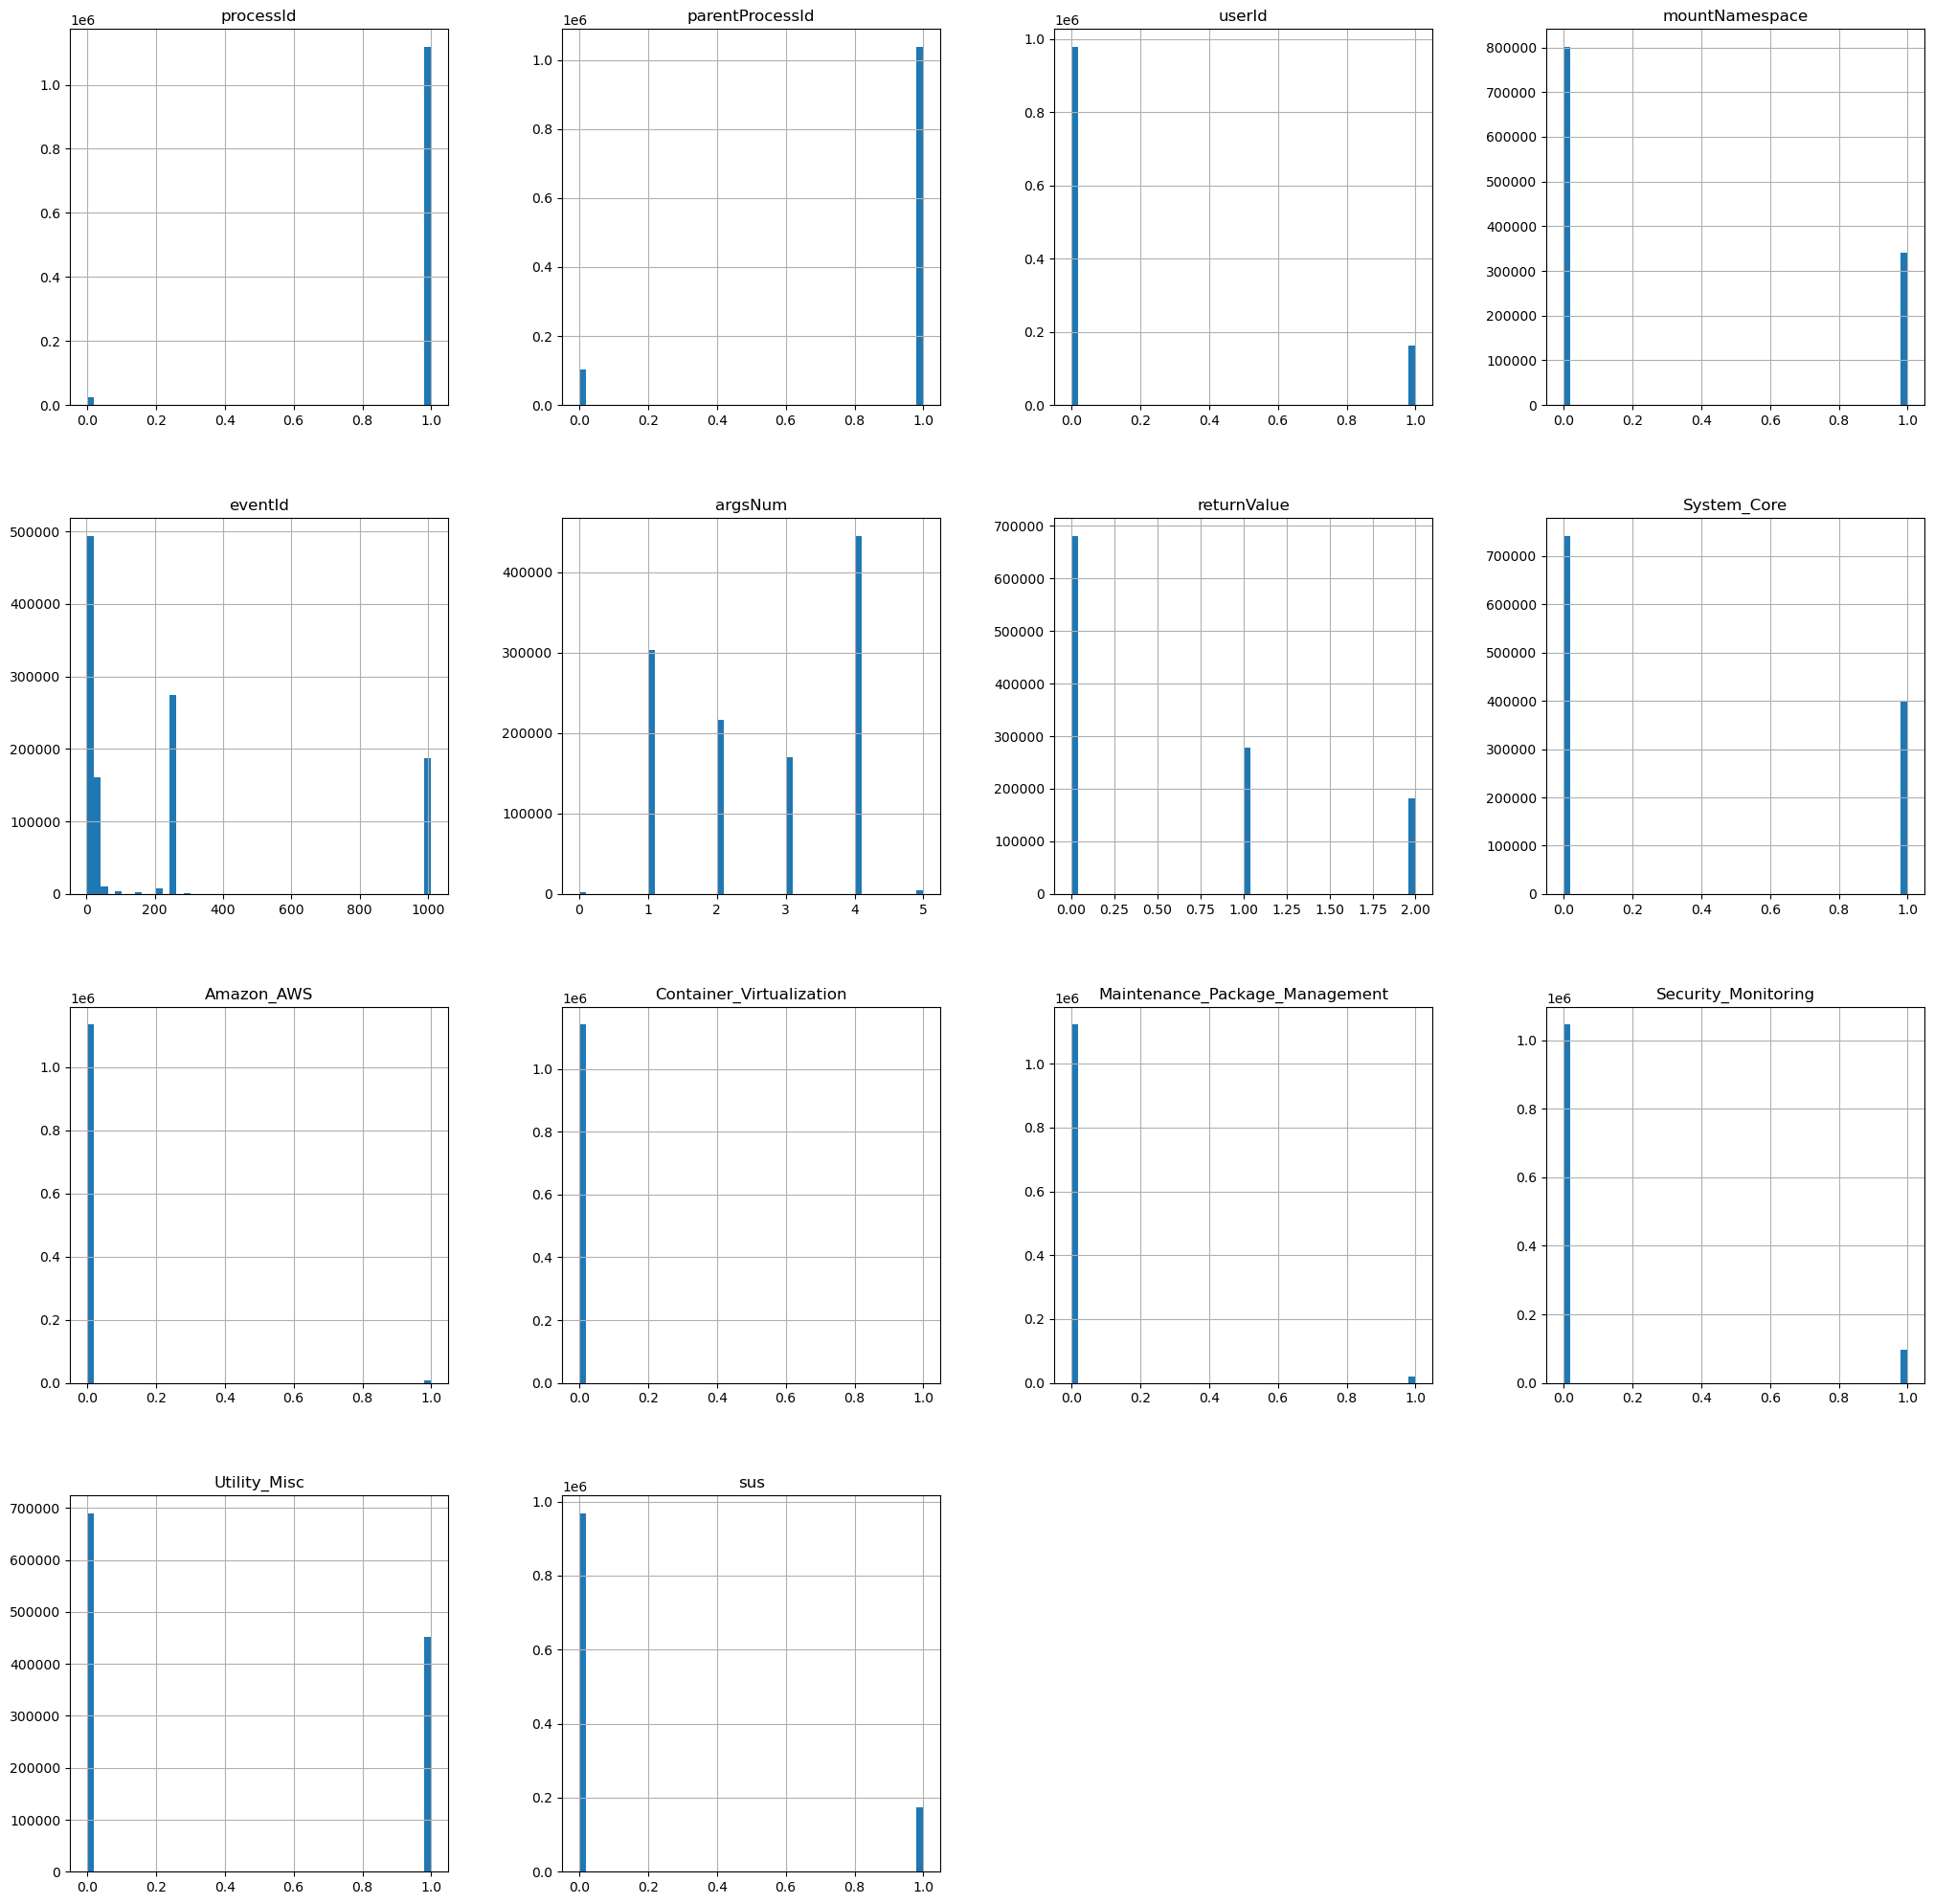

In [52]:
df.hist(bins = 50, figsize = (25,25))
plt.show()

In [53]:
benign = df.loc[df['sus'] == 0, :]
benign.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
count,967564.000000,967564.000000,967564.0,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.000000,967564.0
mean,0.976268,0.898877,0.0,0.351300,267.621529,2.627771,0.350763,0.406829,0.006491,0.000030,0.019317,0.095068,0.466343,0.0
std,0.152212,0.301492,0.0,0.477377,371.916479,1.334452,0.545898,0.491243,0.080302,0.005475,0.137635,0.293308,0.498866,0.0
min,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,0.0,0.000000,41.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,0.0,1.000000,257.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,0.0,1.000000,1010.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [54]:
evil = df.loc[df['sus'] == 1, :]
evil.describe()

,processId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,System_Core,Amazon_AWS,Container_Virtualization,Maintenance_Package_Management,Security_Monitoring,Utility_Misc,sus
count,173514.0,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.000000,173514.0,173514.0,173514.000000,173514.000000,173514.000000,173514.0
mean,1.0,0.967334,0.939544,0.000207,68.203056,2.915719,1.744194,0.031629,0.0,0.0,0.000870,0.023958,0.003988,1.0
std,0.0,0.177761,0.238331,0.014403,151.489930,0.530629,0.635703,0.175010,0.0,0.0,0.029487,0.152918,0.063026,0.0
min,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
25%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
50%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
75%,1.0,1.000000,1.000000,0.000000,42.000000,3.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
max,1.0,1.000000,1.000000,1.000000,1010.000000,5.000000,2.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.0


Lets see the overlap

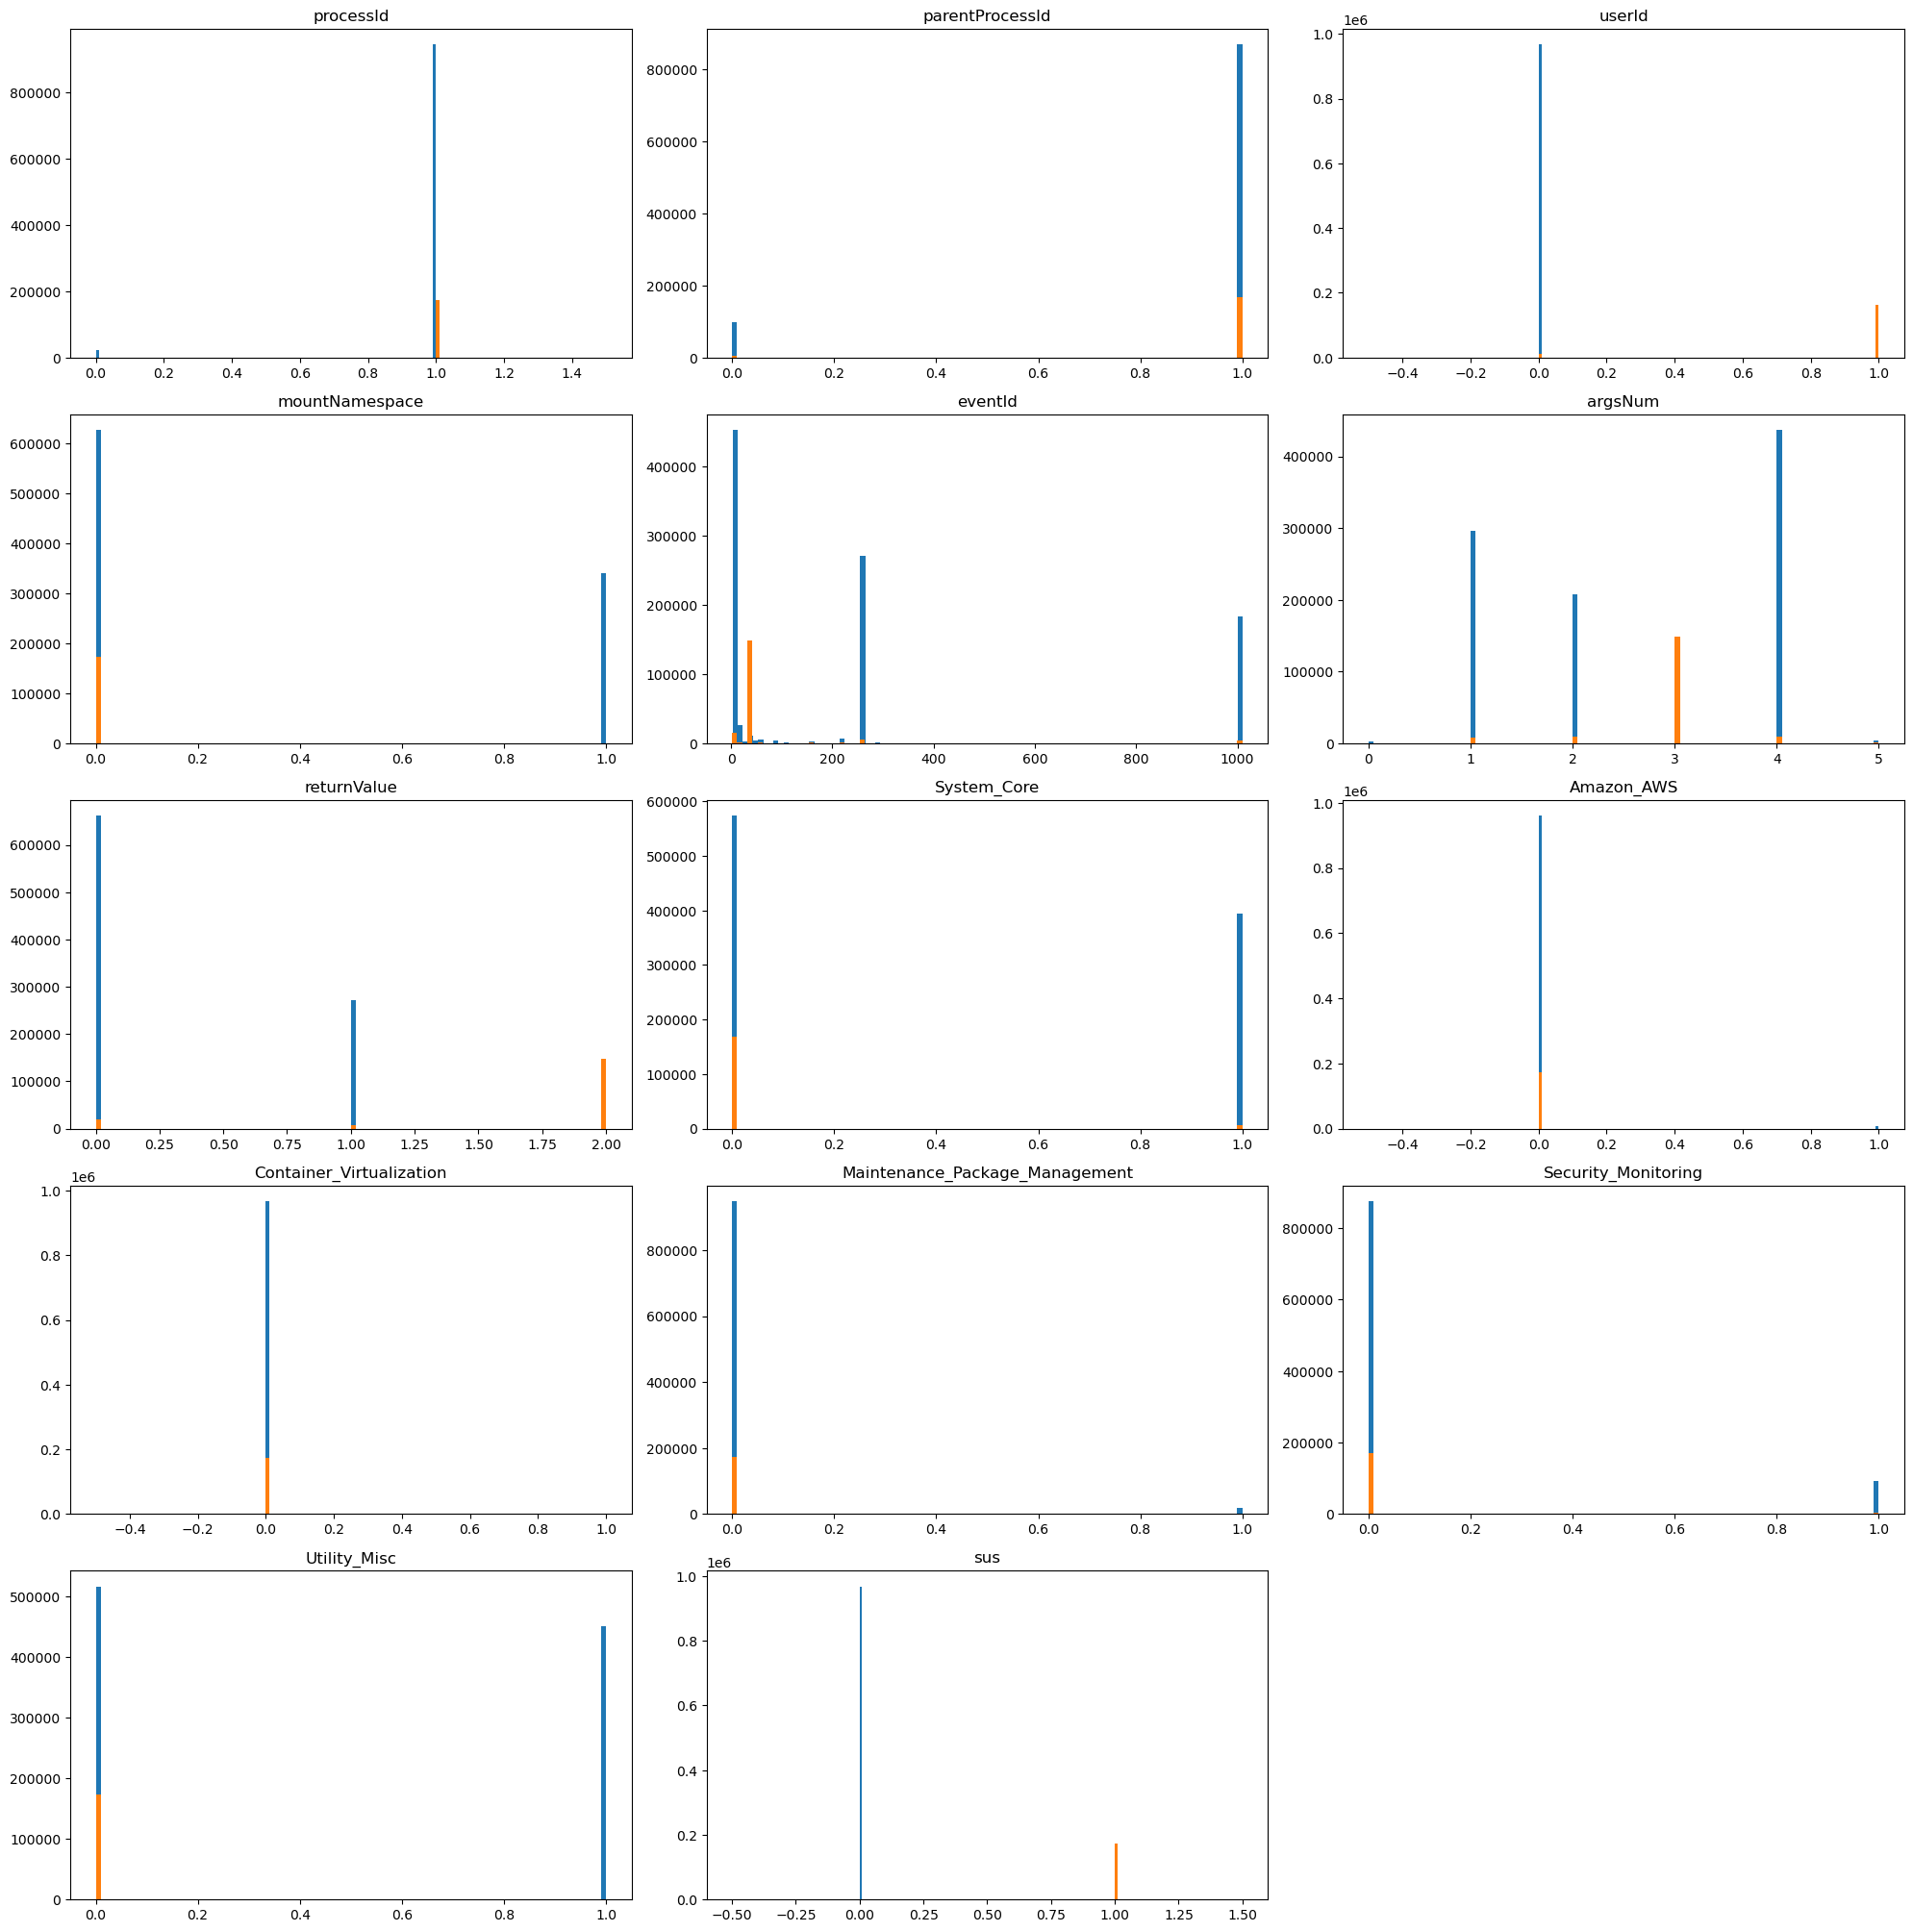

In [55]:
plt.figure(figsize=(20,40))
num=1
for col in benign.columns:
    plt.subplot(10,3,num)
    plt.hist(benign[col], bins = 100)
    plt.hist(evil[col],bins = 100)
    plt.title(col)
    num=num+1
plt.tight_layout()
plt.show()

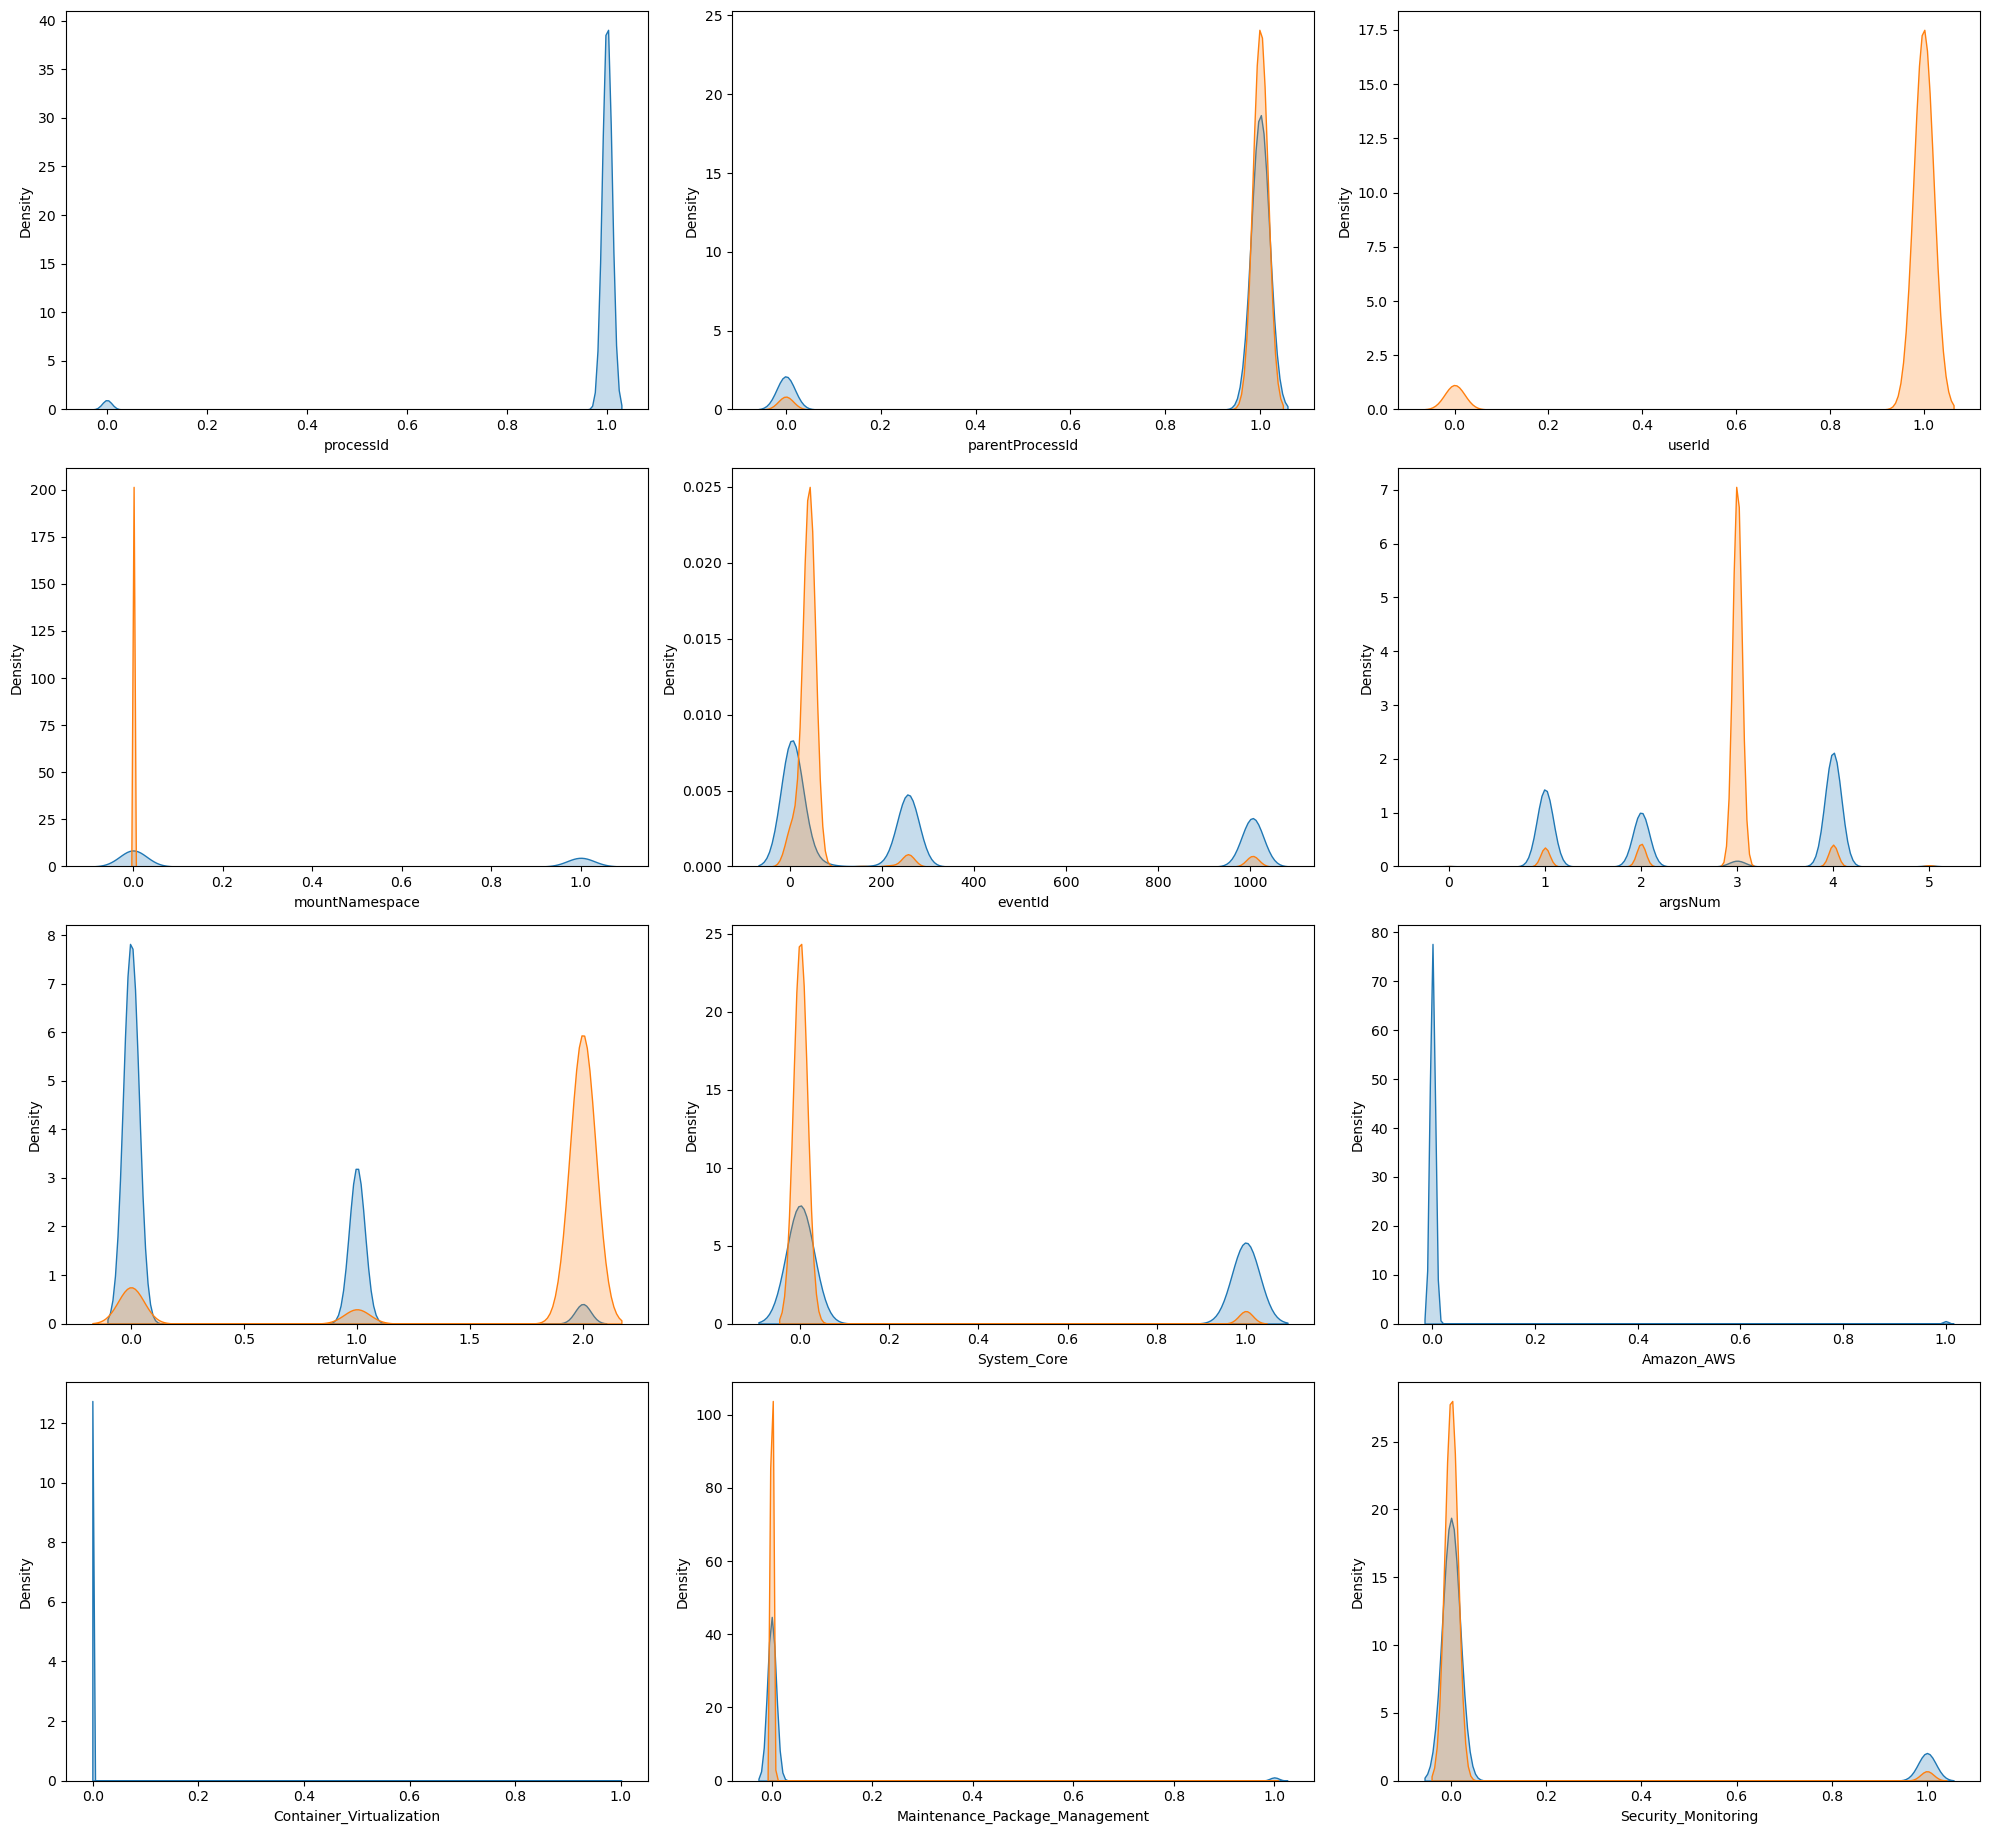

In [56]:
features = df.columns[:-2]

plt.figure(figsize=(20,50))
num=1
for feature in features:
    plt.subplot(11,3,num)
    sns.kdeplot(benign[feature], shade= True)
    sns.kdeplot(evil[feature], shade= True)
    num=num+1
    plt.tight_layout()
plt.show()

Lets look at the frequency of our target features

In [57]:
df.evil.value_counts().plot(kind='bar', title='Label Frequency for evil label in Dataset')

AttributeError: 'DataFrame' object has no attribute 'evil'

In [ ]:
df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,967564
1,173514


<Axes: title={'center': 'Label Frequency for sus label in Dataset'}, xlabel='evil'>

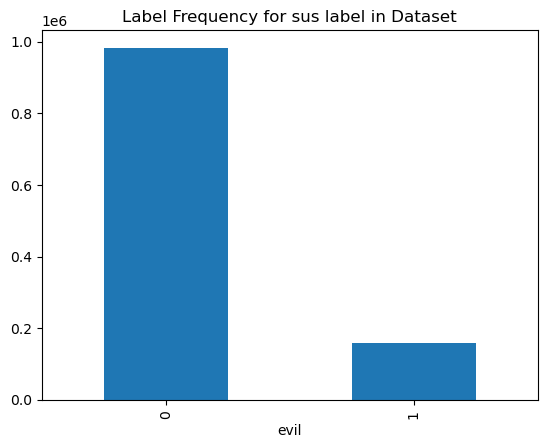

In [ ]:
df.evil.value_counts().plot(kind='bar', title='Label Frequency for sus label in Dataset')

In [ ]:
df.groupby(['sus'])[['argsNum']].count()

,argsNum
sus,
0,967564
1,173514


In [ ]:
df.groupby(['sus','evil'])[['argsNum']].count()

argsNum
sus evil         
0   0      967564
1   0       15082
    1      158432

Lets explore feature correlation

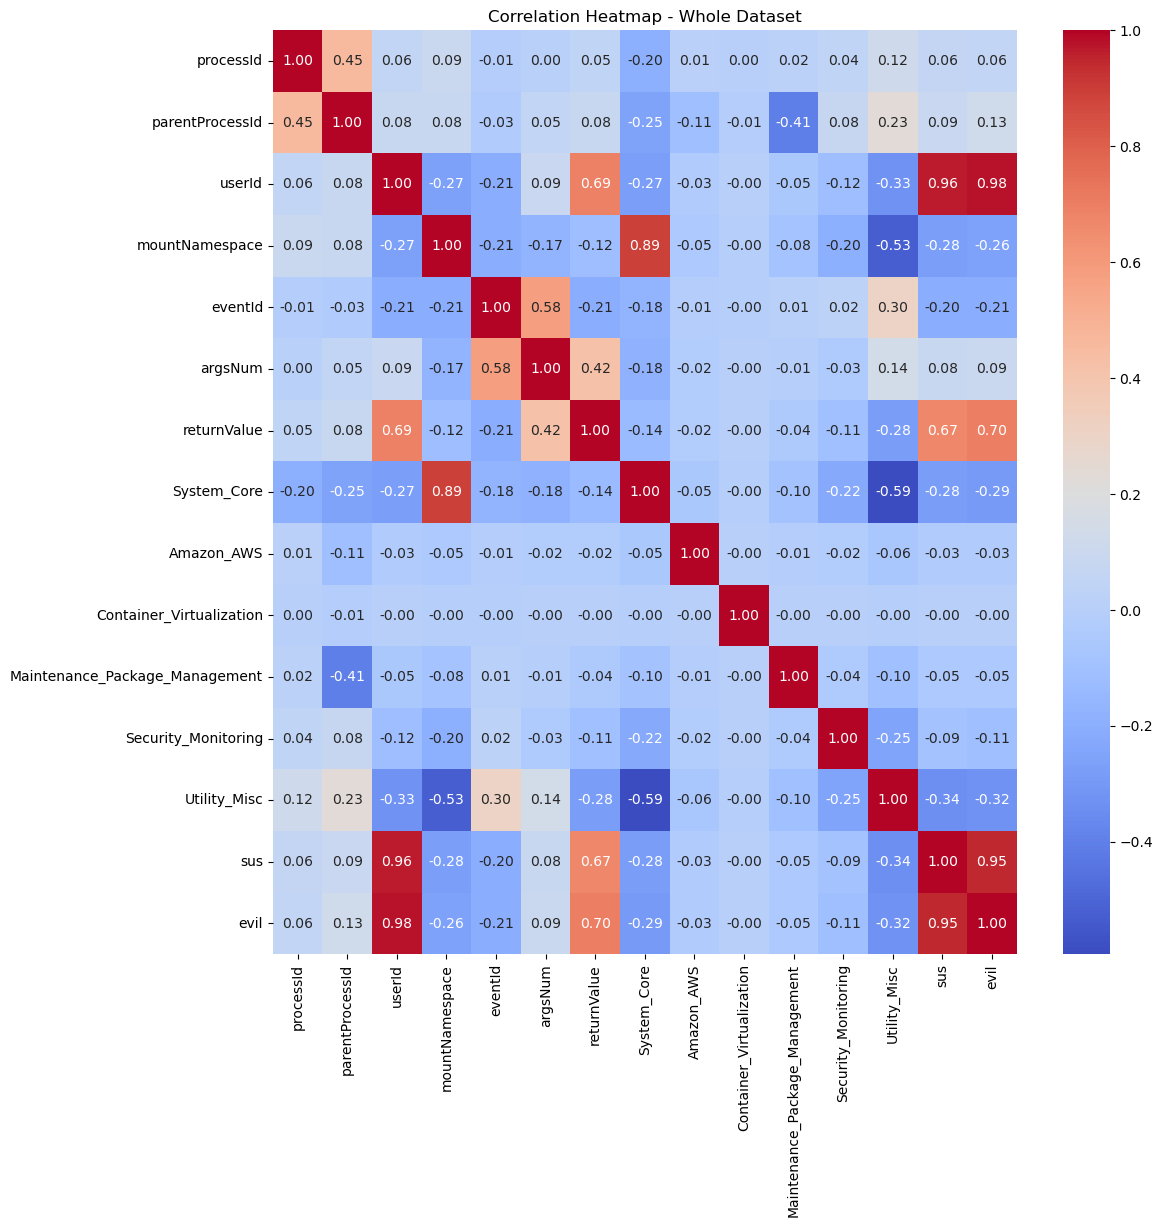

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
corr = numeric_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Whole Dataset')
plt.show()


In [ ]:
highest_correlation = corr.unstack().sort_values(ascending=False)
highest_correlation = highest_correlation[highest_correlation != 1.0].drop_duplicates()
print("Highest correlation values in whole dataset:")
print(highest_correlation.head(50))


Highest correlation values in whole dataset:
evil                            userId                            0.975275
userId                          sus                               0.964089
evil                            sus                               0.948190
mountNamespace                  System_Core                       0.888148
returnValue                     evil                              0.695673
userId                          returnValue                       0.693171
sus                             returnValue                       0.665959
argsNum                         eventId                           0.578328
parentProcessId                 processId                         0.453708
returnValue                     argsNum                           0.420591
eventId                         Utility_Misc                      0.304074
Utility_Misc                    parentProcessId                   0.233358
argsNum                         Utility_Misc           

Entropy Analysis

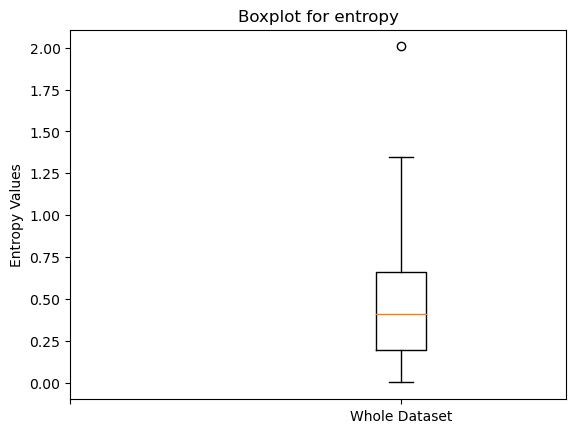

In [ ]:
dataset = [df]
entropy_vals = []
for data in dataset:
    dataset_entropy_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_entropy = stats.entropy(counts)
            dataset_entropy_vals.append(feat_entropy)
            
    entropy_vals.append(dataset_entropy_vals)

plt.boxplot(entropy_vals)
plt.title('Boxplot for entropy')
plt.ylabel("Entropy Values")
plt.xticks([1,0],labels=['Whole Dataset',''])
plt.show()

Variation

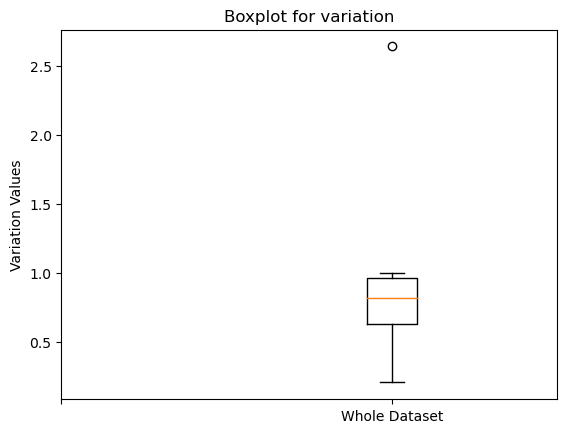

In [ ]:
dataset = [df]
variation_vals = []
for data in dataset:
    dataset_var_vals = []
    for featureX in data.columns:
        if featureX == 'timestamp':
            pass
        else:
            counts = data[featureX].value_counts()
            feat_var = stats.variation(counts)
            dataset_var_vals.append(feat_var)
            
    variation_vals.append(dataset_var_vals)

plt.boxplot(variation_vals)
plt.title('Boxplot for variation')
plt.ylabel("Variation Values")
plt.xticks([1,0],labels=['Whole Dataset',''])
plt.show()